Epoch 50/500, Loss: 2.6608201234930475
Epoch 100/500, Loss: 2.631577618531209
Epoch 150/500, Loss: 2.6137991487713452
Epoch 200/500, Loss: 2.6029904308651712
Epoch 250/500, Loss: 2.59641909011688
Epoch 300/500, Loss: 2.592423933651054
Epoch 350/500, Loss: 2.589995011487706
Epoch 400/500, Loss: 2.588518307652433
Epoch 450/500, Loss: 2.5876205208686422
Epoch 500/500, Loss: 2.5870746963844784
Trained Weight: 2.9488175802638805, Trained Bias: 0.47055314604888054


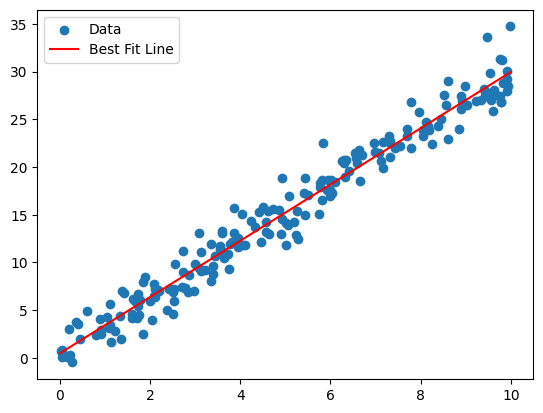

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(seed, num_points, scale, true_weight, noise_scale):
    np.random.seed(seed)
    X = np.random.rand(num_points, 1) * scale  # Random data between 0 and `scale`
    y = true_weight * X + np.random.randn(num_points, 1) * noise_scale  # Add noise
    return X, y

# Prediction function
def predict(X, weight, bias):
    return weight * X + bias

# Compute Mean Squared Error
def compute_loss(y_true, y_pred):
    errors = y_pred - y_true
    mse = np.mean(errors ** 2)
    return mse

# Compute gradients for weight and bias
def compute_gradients(X, y_true, y_pred):
    errors = y_pred - y_true
    weight_gradient = (2 / len(X)) * np.sum(errors * X)
    bias_gradient = (2 / len(X)) * np.sum(errors)
    return weight_gradient, bias_gradient

# Perform gradient descent
def gradient_descent(X, y, weight, bias, learning_rate, epochs):
    for epoch in range(epochs):
        # Make predictions
        y_pred = predict(X, weight, bias)

        # Compute loss
        loss = compute_loss(y, y_pred)

        # Compute gradients
        weight_gradient, bias_gradient = compute_gradients(X, y, y_pred)

        # Update parameters
        weight -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        # Print loss every 50 epochs
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    return weight, bias

# Main function
def main():
    # Data generation
    X, y = generate_data(seed=100, num_points=200, scale=10, true_weight=3.0, noise_scale=1.5)

    # Initialize parameters
    weight = np.random.randn()
    bias = np.random.randn()
    learning_rate = 0.01
    epochs = 500

    # Train the model
    weight, bias = gradient_descent(X, y, weight, bias, learning_rate, epochs)

    # Print final parameters
    print(f"Trained Weight: {weight}, Trained Bias: {bias}")

    # Plot the results
    plt.scatter(X, y, label='Data')
    best_fit_x = np.linspace(0, 10, 100).reshape(-1, 1)
    best_fit_y = predict(best_fit_x, weight, bias)
    plt.plot(best_fit_x, best_fit_y, color='red', label='Best Fit Line')
    plt.legend()
    plt.show()

# Run the program
if __name__ == "__main__":
    main()
